In [3]:
import scanpy as sc
import pandas as pd
import infercnvpy as cnv

import sys
import os 
sys.path.append(os.path.expanduser(f"~/SSS_mount/insituCNV/InSituCNV"))
import insitucnv as icv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read in datasets

In [ ]:
print('reading snpathoseq...')
adata_snpatho = sc.read(os.path.expanduser("~/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/snPATHOseq/snPATHOseq_221_common_CNVinf.h5ad"))
print('reading cosmx..')
adata_cosmx = sc.read(os.path.expanduser("~/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/221/CosMx_221_common_CNVinf.h5ad"))

reading snpathoseq...
reading cosmx..


## Compute the average CNV profiles for each CNV cluster

In [ ]:
cosmx_cnv_profiles = icv.tl.compute_avg_cnv_profiles(adata_cosmx, group_by='epi_cnv_leiden_res0.1', label='CosMx')
snpatho_cnv_profiles = icv.tl.compute_avg_cnv_profiles(adata_snpatho, group_by='epi_cnv_leiden_res0.175', label='snPATHOseq')

## Compute and plot similarity matrix of the CNV clusters from CosMx vs snPATHO-seq

In [38]:
similarity_matrix = icv.tl.compute_cnv_similarity_matrix(snpatho_cnv_profiles, cosmx_cnv_profiles)
similarity_matrix

,CosMx_0,CosMx_2,CosMx_non-epi,CosMx_3,CosMx_1
snPATHOseq_2,0.624639,0.022264,0.014981,0.012063,0.146545
snPATHOseq_non-epi,0.206239,0.050600,0.220586,0.078878,0.127014
snPATHOseq_0,0.285932,0.764136,-0.068024,0.551932,0.812797
snPATHOseq_3,0.174547,0.675165,-0.010572,0.692304,0.703078
snPATHOseq_1,0.399070,0.701413,-0.009328,0.533649,0.742878


In [39]:
# Save 
similarity_matrix.to_csv("cnv_cosine_similarity_matrix.csv")

In [4]:
similarity_matrix = pd.read_csv("cnv_cosine_similarity_matrix.csv", index_col=0)
similarity_matrix

,CosMx_0,CosMx_2,CosMx_non-epi,CosMx_3,CosMx_1
snPATHOseq_2,0.624639,0.022264,0.014981,0.012063,0.146545
snPATHOseq_non-epi,0.206239,0.050600,0.220586,0.078878,0.127014
snPATHOseq_0,0.285932,0.764136,-0.068024,0.551932,0.812797
snPATHOseq_3,0.174547,0.675165,-0.010572,0.692304,0.703078
snPATHOseq_1,0.399070,0.701413,-0.009328,0.533649,0.742878


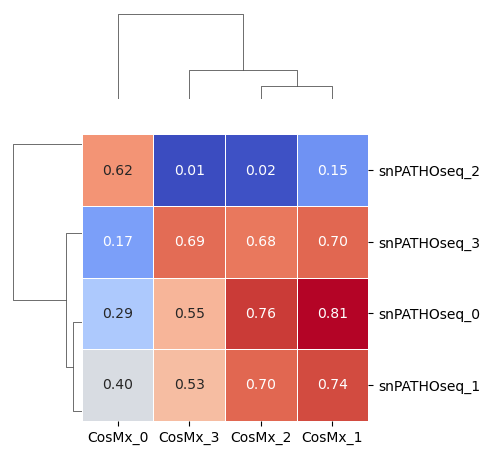

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting clustered heatmap
g = sns.clustermap(similarity_matrix
                    .drop(index='snPATHOseq_non-epi', errors='ignore')
                    .drop(columns='CosMx_non-epi', errors='ignore'),
                   annot=True, 
                   fmt=".2f", 
                   cmap="coolwarm", 
                   figsize=(5, 5),
                   cbar_pos=None,
                   linewidths=0.5,
                   row_cluster=True, 
                   col_cluster=True)

g.ax_heatmap.set_aspect('equal')

# plt.savefig('snpathoseq_vs_cosmx_cosine_similarity_matrix.pdf')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Select the malignant clusters
malignant_cosmx_clusters = ['CosMx_1', 'CosMx_2', 'CosMx_3']
malignant_snpatho_clusters = ['snPATHOseq_0', 'snPATHOseq_1', 'snPATHOseq_3']


# Compute averaged profiles
avg_snpatho = icv.tl.average_profiles(malignant_snpatho_clusters, snpatho_cnv_profiles)
avg_cosmx = icv.tl.average_profiles(malignant_cosmx_clusters, cosmx_cnv_profiles)

In [50]:
avg_cosmx.head()

,bin_index,chromosome,mean_cnv
0,0,chr1,0.000107
1,1,chr1,0.000067
2,2,chr1,0.000046
3,3,chr1,0.000015
4,4,chr1,0.000007


In [51]:
avg_snpatho.head()

,bin_index,chromosome,mean_cnv
0,0,chr1,0.001216
1,1,chr1,0.001051
2,2,chr1,0.000758
3,3,chr1,0.000649
4,4,chr1,0.000374


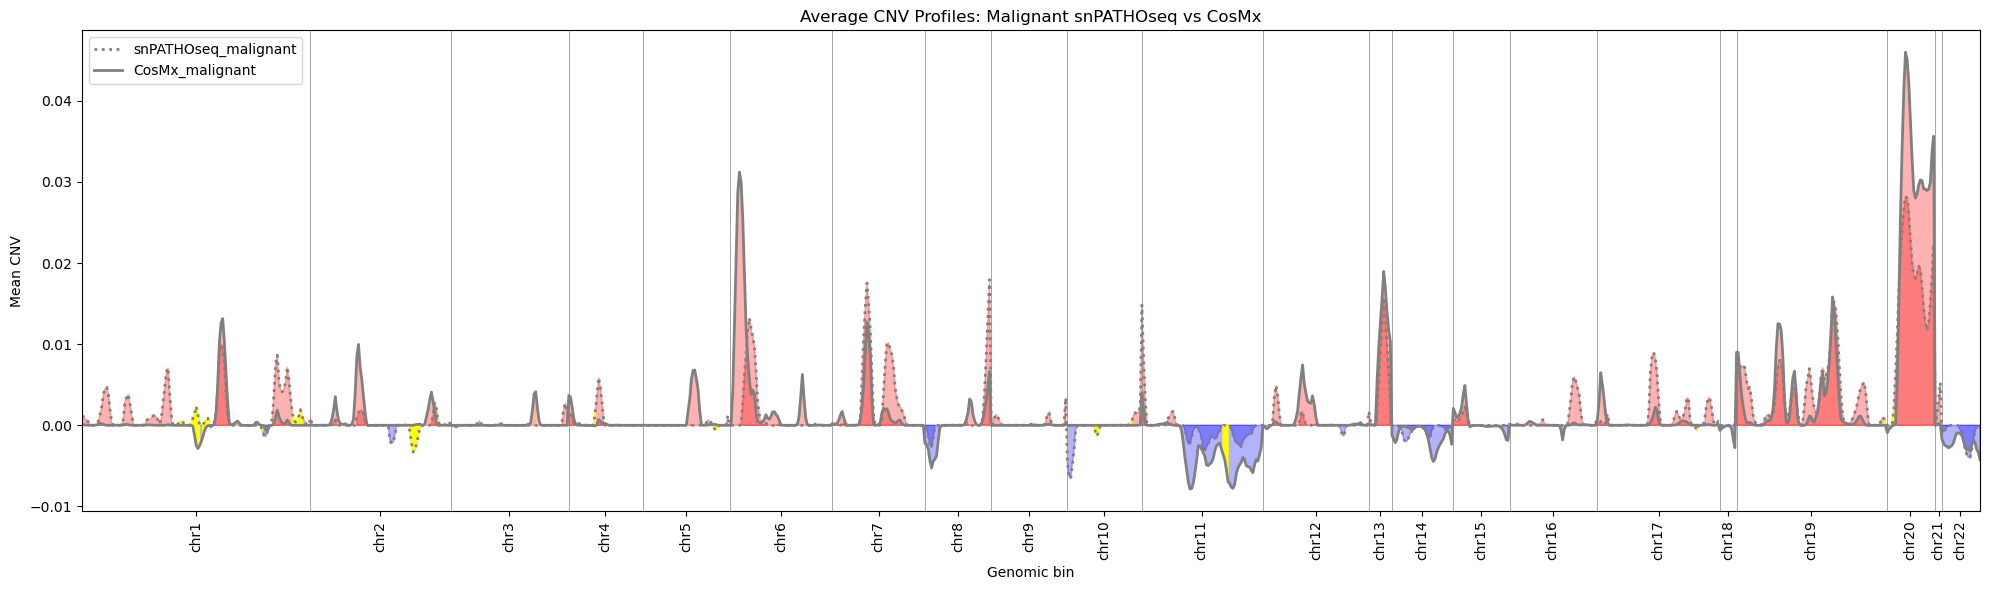

In [79]:
icv.tl.plot_avg_cnv_comparison(
    df1 = avg_snpatho,
    df2 = avg_cosmx,
    chr_pos=adata_snpatho.uns['cnv']['chr_pos'],
    label1='snPATHOseq_malignant',
    label2='CosMx_malignant',
    title='Average CNV Profiles: Malignant snPATHOseq vs CosMx',
    save_path='avg_cnv_malignant_comparison.pdf'
)